<a href="https://colab.research.google.com/github/moustafa-7/PyTorch-Course/blob/master/Feed_Forward_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn as nn
from torch.autograd import Variable


In [0]:
train_dset = dsets.MNIST('./root', train = True, download = True,
                         transform = transforms.ToTensor())

In [0]:
test_dset = dsets.MNIST('./root', train = False, download = True,
                        transform = transforms.ToTensor())

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [18]:
train_dset[0]

NameError: ignored

In [0]:
show_img = train_dset[0][0].numpy()

In [23]:
show_img.shape


(1, 28, 28)

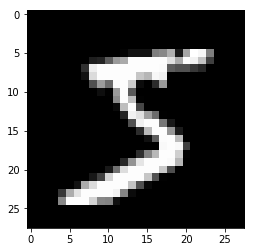

In [24]:
plt.imshow(show_img.reshape(28,28), cmap = 'gray')

In [25]:
batch_size = 100
n_iters = 3000

epochs = n_iters / (len(train_dset) / batch_size)
epochs = int(epochs)
epochs

5

In [0]:
 train_loader = torch.utils.data.DataLoader(dataset = train_dset, shuffle = True, batch_size = batch_size)

In [0]:
test_loader = torch.utils.data.DataLoader(dataset = test_dset, shuffle = True, batch_size = batch_size)

In [28]:
import collections
isinstance(train_loader , collections.Iterable)

True

## Build the model

In [0]:
class feed_forward_model(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(feed_forward_model, self).__init__()
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.sigmoid = nn.Sigmoid()
    self.linear2 = nn.Linear(hidden_dim, output_dim)
    
    
  def forward(self, x):
    out = self.linear1(x)
    out = self.sigmoid(out)
    out = self.linear2(out)
    
    return out
    

In [0]:
input_dim = 28*28
hidden_dim = 128
output_dim = 10
model = feed_forward_model(input_dim, hidden_dim, output_dim)


In [0]:
criterion = nn.CrossEntropyLoss()

In [0]:
lr = 0.1

optimizer = torch.optim.SGD(lr = lr, params = model.parameters())

In [40]:
print(torch.cuda.is_available())

True


## Iterate

In [38]:
iter = 0

for epoch in range(epochs):
  for i, (images, labels) in enumerate(train_loader):
    
    images = Variable(images.view(-1,28*28))
    
    labels = Variable(labels)
    
    
    optimizer.zero_grad()
    
    outputs = model(images)
    
    loss = criterion(outputs, labels)
    
    loss.backward()
    
    optimizer.step()
    
    iter += 1
    
    if (iter%500 == 0):
      
      correct = 0
      total = 0
      
      
      
      """
      for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum()
        
      accuracy = 100 * correct / total
      
      print('Iteration: {}. Loss: {}. Accuracy: {}' .format(iter, loss.data, accuracy))
      
      """
      for images, labels in test_loader:
        
        images = Variable(images.view(-1, 28*28))
        
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted.cpu() == labels.cpu()).sum()
       
      accuracy = 100 * correct / total
      
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter,loss.data, accuracy))
      
      

Iteration: 500. Loss: 2.1355140209198. Accuracy: 54
Iteration: 1000. Loss: 1.877022385597229. Accuracy: 61
Iteration: 1500. Loss: 1.5521618127822876. Accuracy: 71
Iteration: 2000. Loss: 1.2190194129943848. Accuracy: 76
Iteration: 2500. Loss: 0.9571442604064941. Accuracy: 80
Iteration: 3000. Loss: 0.8708904981613159. Accuracy: 82


In [0]:
output = model(train_dset[0][0].view(28*28))

In [8]:
print(output)

NameError: ignored

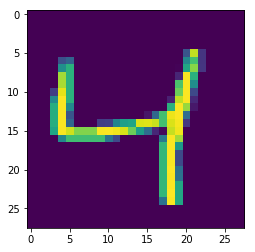

In [64]:
plt.imshow(train_dset[2][0].numpy().reshape(28,28))